In [1]:
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
import glob
import os

In [3]:
def model_settings(model):
    settings = {'label': model}
    if 'BART' in model:
        settings['color'] = 'blue'
    elif 'T5' in model:
        settings['color'] = 'red'
    elif 'PEGASUS' in model:
        settings['color'] = 'green'
    if '256' in model:
        settings['linestyle'] = 'dotted'
    elif '512' in model:
        settings['linestyle'] = 'solid'
    return settings

In [4]:
def format_model(name):
    if 'bart' in name:
        model = 'BART'
    elif 't5' in name:
        model = 'T5'
    elif 'pegasus' in name:
        model = 'PEGASUS'
    if '256' in name:
        article = 256
    elif '512' in name:
        article = 512
    return '{}-{}'.format(model, article)

In [5]:
def training_helper(data, x, y, title, x_label, y_label, skip=[]):
    # Makes a training curve from labels x and y
    fig, ax = plt.subplots(dpi=200)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    for (model, file) in data:
        if model[:model.index('-')] in skip:
            continue
        df = pd.read_csv(file)
        X = df[x]
        Y = df[y]
        settings = model_settings(model)
        ax.plot(X, Y, **settings)
    ax.legend()
    save_title = ''.join(title.split())
    save_title += '.svg'
    plt.savefig(save_title, format='svg', facecolor='white')

In [6]:
training_files = glob.glob(os.path.abspath(os.path.join(os.getcwd(), '..', 'src', 'out', '*.csv')))
training_models = [format_model(file) for file in training_files]
training_data = sorted(list(zip(training_models, training_files)))

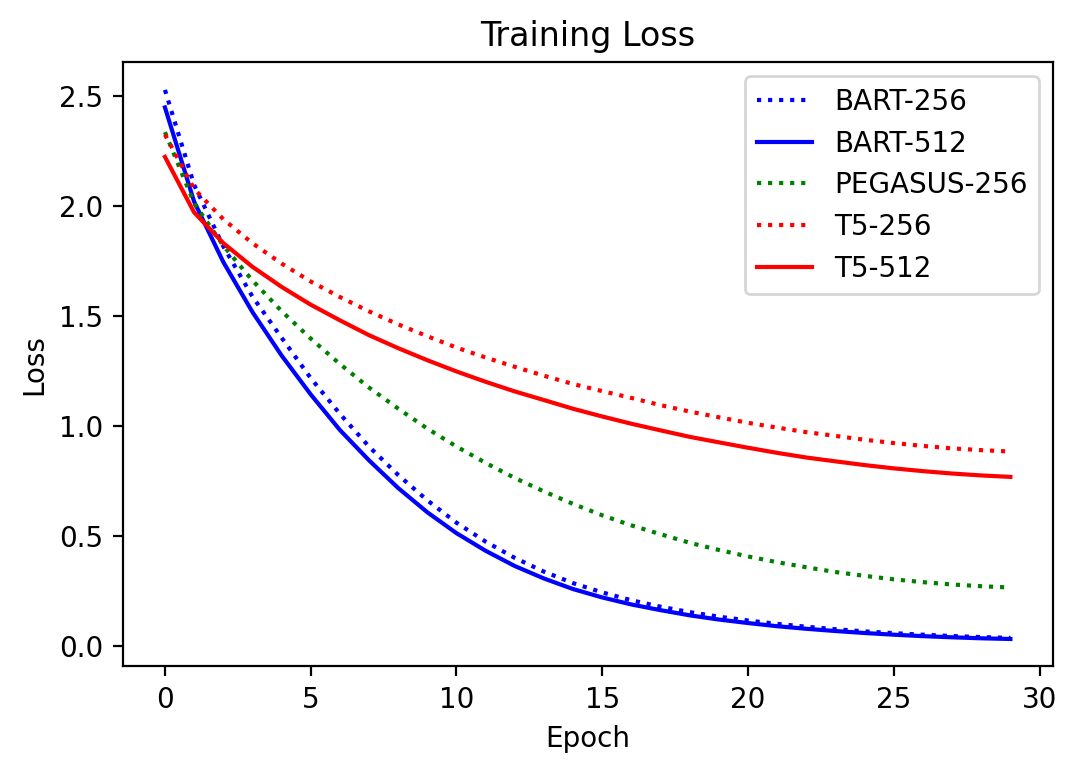

In [7]:
training_helper(training_data, 'epoch', 'loss', 'Training Loss', 'Epoch', 'Loss')

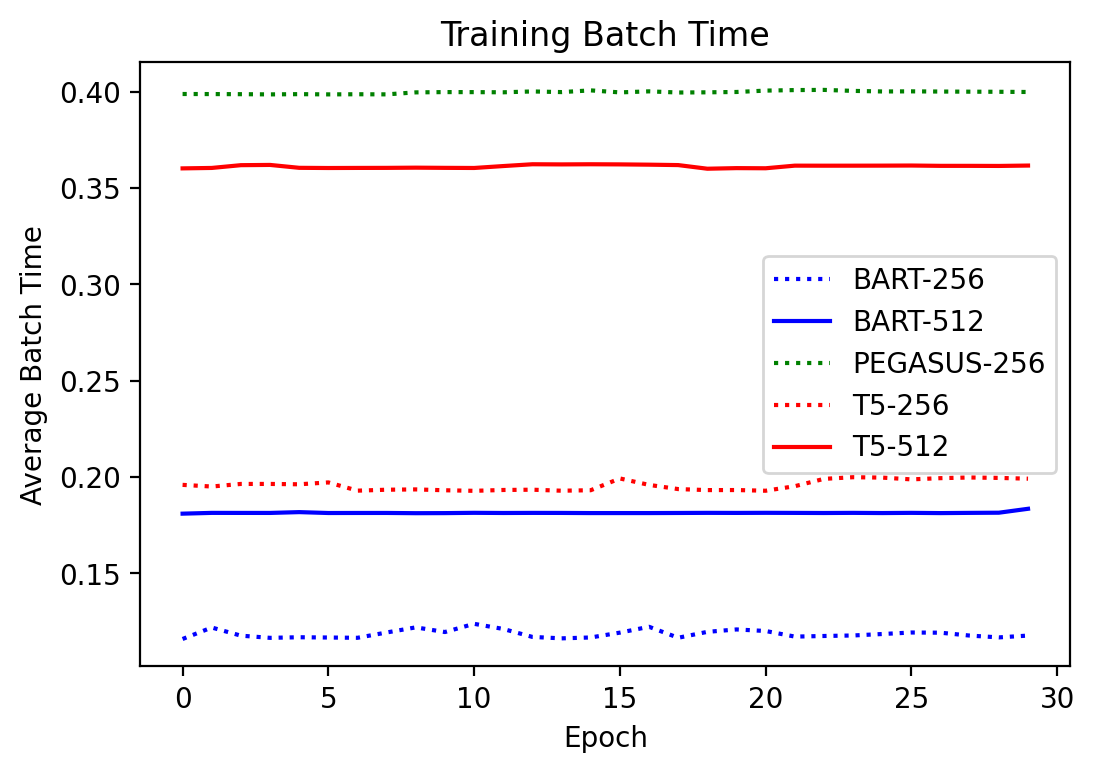

In [8]:
training_helper(training_data, 'epoch', 'batch_time', 'Training Batch Time', 'Epoch', 'Average Batch Time')

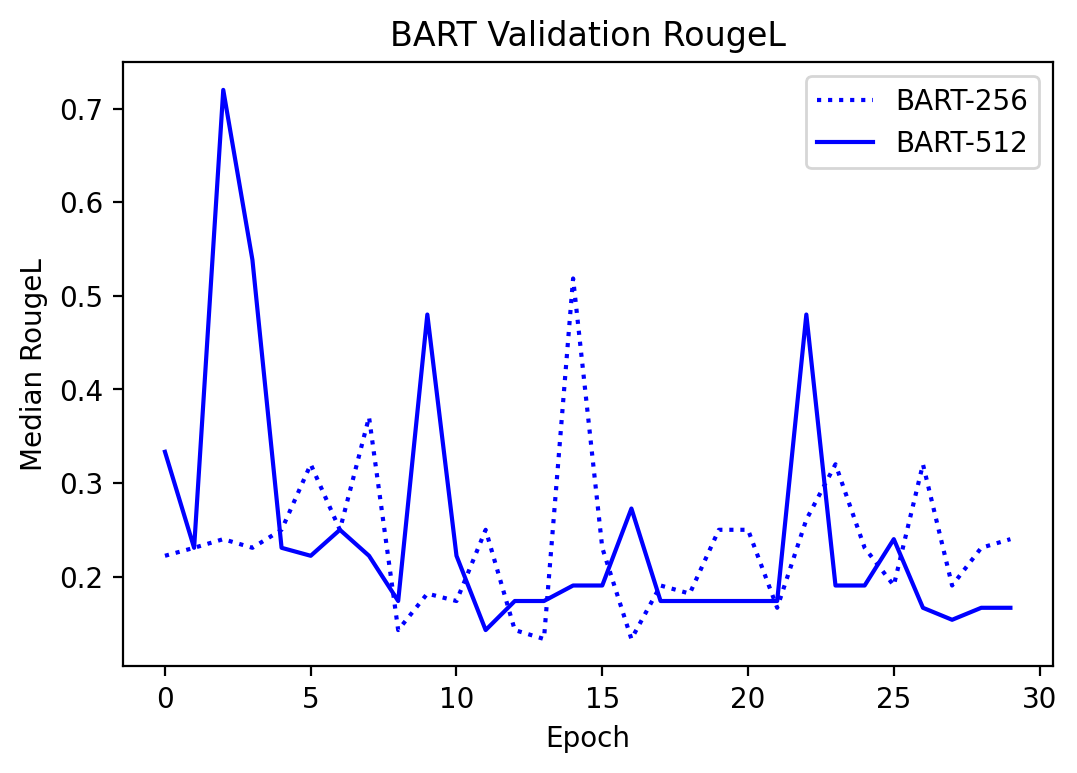

In [9]:
training_helper(training_data, 'epoch', 'rougeL', 'BART Validation RougeL', 'Epoch', 'Median RougeL', skip=['T5', 'PEGASUS'])

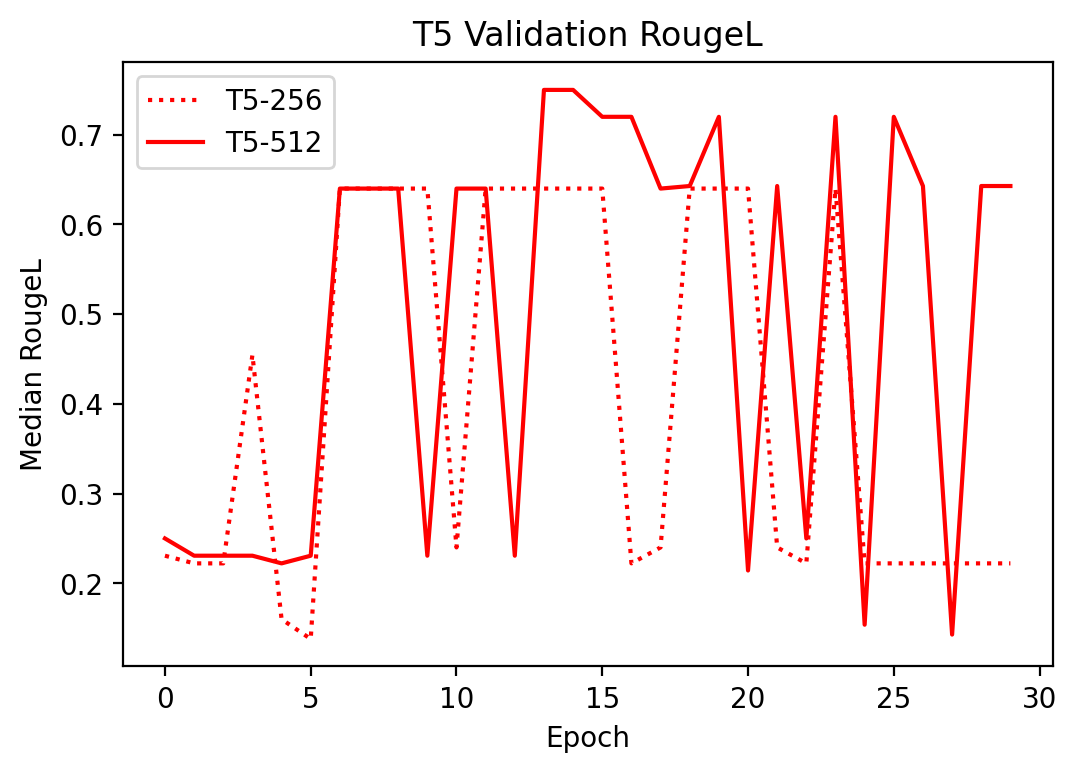

In [10]:
training_helper(training_data, 'epoch', 'rougeL', 'T5 Validation RougeL', 'Epoch', 'Median RougeL', skip=['BART', 'PEGASUS'])

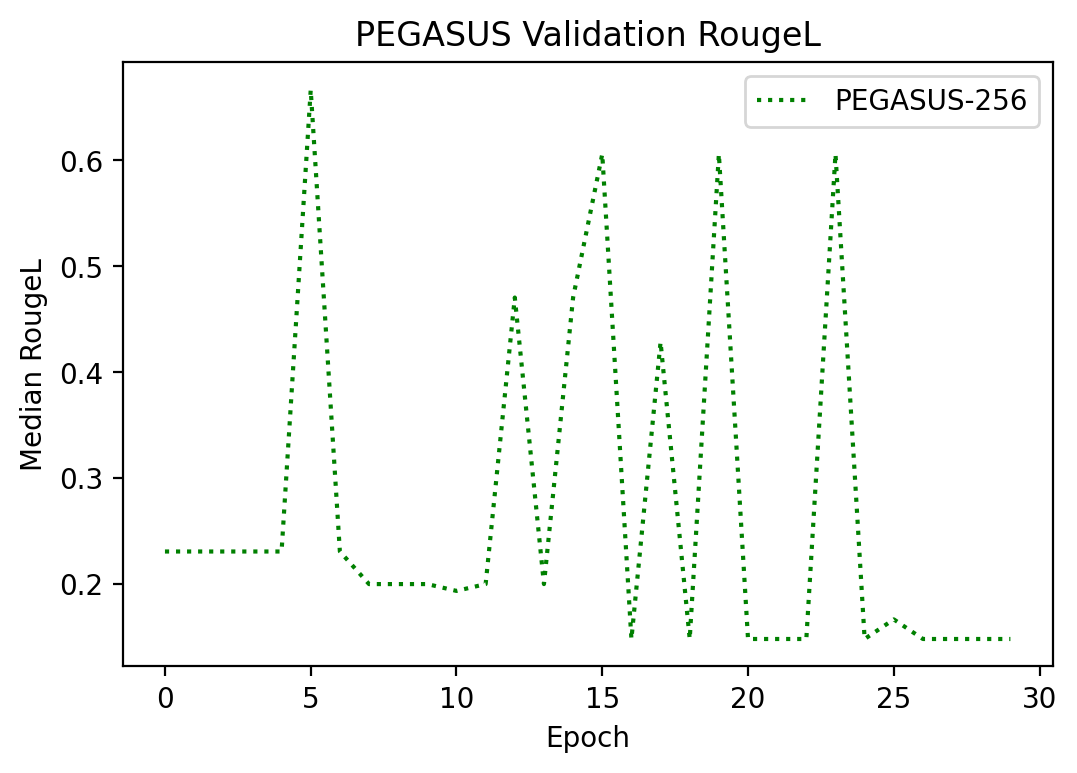

In [11]:
training_helper(training_data, 'epoch', 'rougeL', 'PEGASUS Validation RougeL', 'Epoch', 'Median RougeL', skip=['BART', 'T5'])